## Clasificación de *dígitos de matrículas* de coches

En este *Notebook* vamos a aprender a aplicar una metodología de clasificación de instancias, al caso de la clasificación de elementos que aparecen en las matrículas de los coches.

---

Vamos a utilizar la librería *Pandas*, la cual nos va a permitir leer estructuras de datos escritas en ficheros de *Excel* (".xlsx").

El fichero Excel contiene un conjunto de instancias, donde cada una de ellas es un *vector de características* y la etiqueta asociada a la clase correspondiente.

---

### Lectura de fichero de Excel

Lo primero que hacemos es leer el fichero de Excel, y, en concreto, el contenido de una de sus pestañas.

In [1]:
# Hemos de usar la opción de "DataFrame" de "Pandas" 
import pandas as pd

In [2]:
# Busca cómo se podría leer un fichero de Excel (y qué opciones hay respecto de "pestañas", etc.) y crea un dataframe
# puedes llamar "df"

# df = pd....



In [3]:
# Para ver qué pinta tiene, puedes usar:

df.head()

,Número de instancia,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255,Unnamed: 256,Número de agujeros,Etiqueta/Clase
0,1,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,255.0,255.0,255.0,0,2
1,2,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,255.0,255.0,255.0,255.0,255.0,2,8
2,3,255.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0,7
3,4,255.0,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,255.0,255.0,255.0,255.0,2,8
4,5,255.0,255.0,255.0,255.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,255.0,255.0,255.0,255.0,255.0,1,9


In [4]:
# Genero una "matriz" con todas las filas, pero sin la columna de la "Etiqueta". Para ello, utiliza la opción 
# "drop" del "DataFrame".

# Como segundo paso, puedes convertir esta variable a "valores" mediante el método ".values"

# X = ...

In [5]:
# Genero otra "matriz" con todas las filas, pero sin las columnas de: (1) "Número de agujeros", y (2) "Etiqueta".

# X2 = ...

In [6]:
# Veo la "pinta" que tiene "X"
X

array([[1.000e+00, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        0.000e+00],
       [2.000e+00, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        2.000e+00],
       [3.000e+00, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        0.000e+00],
       ...,
       [2.066e+03, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        0.000e+00],
       [2.067e+03, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        0.000e+00],
       [2.068e+03, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        0.000e+00]])

In [7]:
# Quiero saber el tamaño de "X"
print(X.shape)

(2068, 258)


In [8]:
# Genero el vector columna de etiquetas/clases

# Y=

In [9]:
Y

array(['2', '8', '7', ..., 'I', 'E', 'E'], dtype='<U1')

In [10]:
# Veo la forma como tiene el vector de la fila elegida (en este caso, la tercera)

X2[2067,1:]

array([255., 255., 255., 255.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 255., 255., 255., 255., 255., 255.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 255., 255., 255., 255., 255., 255.,
       255.,   0.,   0.,   0.,   0.,   0.,   0., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255.,   0.,   0.,   0.,   0.,   0.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255.,   0.,   0.,   0.,   0., 255., 255., 255., 255., 255., 255.,
       255., 255., 255., 255., 255., 255., 255.,   0.,   0.,   0., 255.,
       255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
       255.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255., 255., 255.,
       255., 255., 255., 255., 255., 255.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 255., 255., 255., 255., 255., 255., 255., 255.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 255., 255., 255.,
       255., 255., 255., 255., 255.,   0.,   0.,   

In [11]:
imgVec=X2[2067,1:].astype(int)

In [12]:
print(imgVec)

[255 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255 255
 255 255   0   0   0   0   0   0   0 255 255 255 255 255 255 255   0   0
   0   0   0   0 255 255 255 255 255 255 255 255 255 255   0   0   0   0
   0 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0   0 255
 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0 255 255 255
 255 255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0 255
 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0   0 255 255
 255 255 255 255 255 255   0   0   0   0   0   0   0   0 255 255 255 255
 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255 255 255
 255 255   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255
   0   0   0 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0
   0 255 255 255 255 255 255 255 255 255 255 255 255 255   0   0   0 255
 255   0   0   0   0 255 255 255 255 255 255 255   0   0   0   0   0   0
   0   0   0   0 255 255 255 255 255 255   0   0   

In [13]:
print(imgVec.shape)

(256,)


In [14]:
# Voy a redimensionar el vector a matrix de 16x16 para visualizarlo (en realidad, es una imagen)
img = imgVec.reshape(16,16)

In [15]:
print(img)

[[255 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255]
 [255 255 255 255   0   0   0   0   0   0   0 255 255 255 255 255]
 [255 255   0   0   0   0   0   0 255 255 255 255 255 255 255 255]
 [255 255   0   0   0   0   0 255 255 255 255 255 255 255 255 255]
 [255 255 255   0   0   0   0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0 255 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0   0 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0   0 255 255 255 255]
 [255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255 255 255 255 255 255 255 255]
 [255 255 255 255   0   0   0 255 255   0   0   0   0 255 255 255]
 [255 255 255 255   0   0   0   0   0   0   0   0   0   0 255 

C:\Users\Pedro\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:75: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


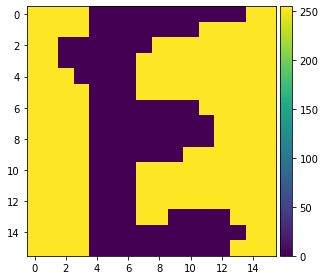

In [35]:
from skimage.io import imshow, imread
imshow(img) # Debería aparecer la letra "E".

---
## Generación de los conjuntos de *entrenamiento* y *test*
---

Una vez se ha definido el conjunto $(X,Y)$, hemos de dividirlo en conjuntos de *entrenamiento* y *test*, de cara a su uso por parte de un clasificador.

In [17]:
from sklearn.model_selection import train_test_split

'''
El par X_train, y_train son los atributos y clases del conjunto de entrenamiento (70% de los ejemplos)
El par X_test, y_test son los atributos y clases del conjunto de test (30% de los ejemplos)

stratify (estratificar) significa que se quiere que haya la misma proporcion de cada una de las clases
tanto en entrenamiento como en test, es decir, no es una partición completamente aleatoria.
'''
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, train_size = 0.7 )

In [18]:
X_train

array([[6.000e+02, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        0.000e+00],
       [1.174e+03, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        1.000e+00],
       [1.147e+03, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        0.000e+00],
       ...,
       [7.600e+01, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        2.000e+00],
       [4.800e+02, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        0.000e+00],
       [1.429e+03, 2.550e+02, 2.550e+02, ..., 2.550e+02, 2.550e+02,
        1.000e+00]])

In [19]:
Y_train

array(['C', 'P', 'S', ..., '8', '5', '6'], dtype='<U1')

In [20]:
# Vamos a entrenar un clasificador del tipo "Multi-layer perceptron" (MLP), con el conjunto de entrenamiento generado.

from sklearn.neural_network import MLPClassifier


classifier = MLPClassifier()

classifier.fit(X_train, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
# A continuación, obtenemos el resultado de la predicción, así como una "impresión por pantalla" de las etiquetas
# predichas para las 20 primeras instancias.

Y_pred = classifier.predict(X_test)
Y_pred[:20]

array(['8', 'N', '4', 'S', 'F', 'K', 'F', '5', '0', 'I', '5', 'B', '5',
       '6', '8', '2', 'F', 'L', '6', '7'], dtype='<U1')

In [22]:
# Esta función permite hacer la evaluación de la predicción de las etiquetas, sobre el conjunto de "test".

def evalua(Y_test, Y_pred):

# A RELLENAR

    return ...


evalua(Y_test, Y_pred)

0.8341384863123994

In [23]:
# A continuación, mostramos lo que se conoce como la "matriz de confusión":


import numpy as np 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

Y_pred = cross_val_predict(MLPClassifier(), X, Y, cv=3)

conf_mat = confusion_matrix(Y, Y_pred,labels=np.unique(Y))
conf_mat

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[52,  0,  0, ...,  0,  0,  0],
       [ 0, 69,  0, ...,  9,  1,  0],
       [ 1,  0, 57, ...,  1,  0,  2],
       ...,
       [ 0,  0,  0, ..., 41,  3,  0],
       [ 0,  0,  0, ...,  3, 46,  0],
       [ 0,  0,  4, ...,  0,  0, 44]], dtype=int64)

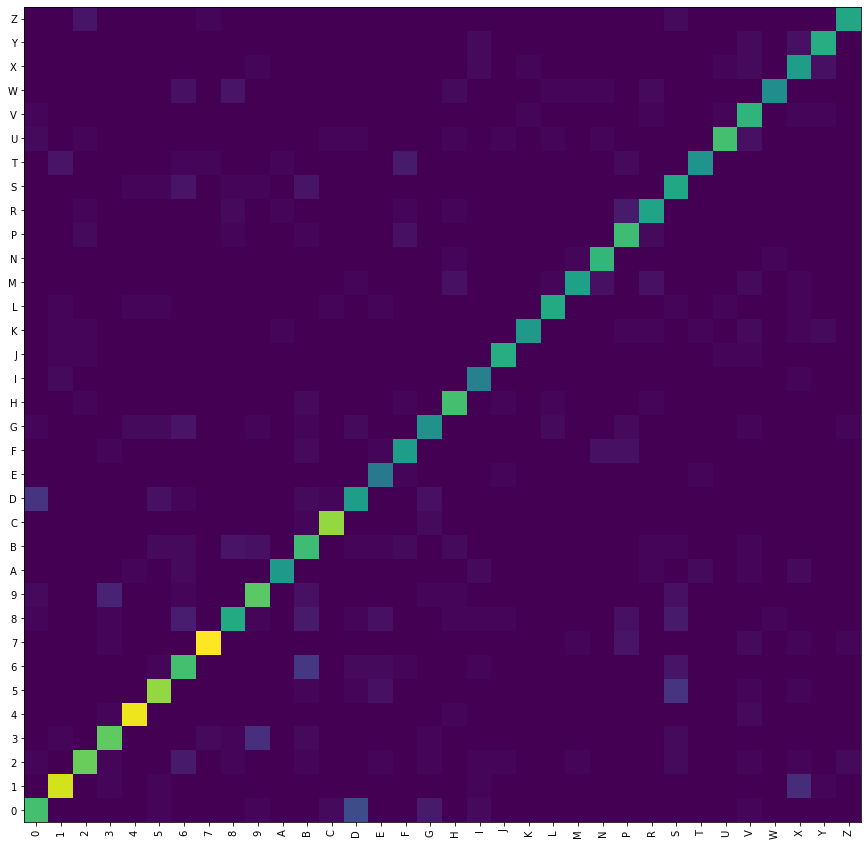

In [24]:
# Hacemos una "visualización" de la misma.

import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt


df = DataFrame(conf_mat, index=np.unique(Y), columns=np.unique(Y))


plt.figure(figsize=(15,15))

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, rotation='vertical')
plt.show()

In [25]:
# Vamos a coger, a continuación, un subconjunto del anterior, formado solamente por dos clases.

# Las dos que vamos a coger serán la "B" y la "8", las cuales pueden tener problemas de "confusión"

X_2C = X[((Y == 'B') | (Y == '8'))]
Y_2C = Y[((Y == 'B') | (Y == '8'))]

In [26]:
Y_2C

array(['8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', '8',
       'B', 'B', '8', 'B', 'B', '8', '8', 'B', '8', 'B', '8', '8', '8',
       'B', 'B', 'B', '8', 'B', 'B', 'B', 'B', '8', '8', '8', '8', 'B',
       'B', 'B', '8', 'B', 'B', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', 'B', '8'], dtype='<U1')

In [27]:
Y_2C_num = (Y_2C == 'B').astype(int)
Y_2C_num

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [28]:
# Entrenmos el perceptron de "Sklearn"

from sklearn.linear_model import Perceptron

X2C_train, X2C_test, Y2C_train, Y2C_test = train_test_split(X_2C, Y_2C_num, stratify=Y_2C_num, train_size = 0.5 )


clf = Perceptron(random_state=None, eta0= 0.1, shuffle=False, fit_intercept=False)
clf.fit(X2C_train, Y2C_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=False, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=None, shuffle=False, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
# Analizamos el resultado de la "predicción"

Y_pred_2C = clf.predict(X2C_test)

evalua(Y2C_test, Y_pred_2C)

0.863013698630137

In [30]:
print(X2C_train)

[[1605.  255.  255. ...  255.  255.    2.]
 [ 249.  255.  255. ...  255.  255.    2.]
 [ 596.  255.  255. ...  255.  255.    2.]
 ...
 [ 325.  255.  255. ...  255.  255.    2.]
 [ 101.  255.  255. ...  255.  255.    2.]
 [ 792.  255.  255. ...  255.  255.    2.]]


---
# Uso del perceptron realizado en la clase anterior 

Habíamos visto que el perceptrón de sklearn tiene un método **fit** que entrena el clasificador.
Nosotros tenemos un método **perceptron_train** que entrena el perceptron y devuelve los pesos.

---

In [31]:
def entrena_perceptron(X, y, z, eta, t):    
    # inicialización de los pesos
    
    
    w = np.zeros(len(X[0]))       
    n = 0                           # numero de iteraciones se inicializa a 0                     
    
    # Inicialización de variables adicionales 
    yhat_vec = np.zeros(len(y))     # array para las predicciones de cada ejemplo
    errors = np.zeros(len(y))       # array para los errores (valor real - predicción)
    J = []                          # error total del modelo     
    
    
    while n < t:  
        ############## a completar (desde aqui) #################
        # para cada ejemplo x del conjunto de datos X
        #        Calcular el sumatorio de las entradas por los pesos (np.dot) 
        #        Se hace pasar el valor resultante por la función de activación 
        #        Para cada peso
        #              actualizar peso
        #######################################################
        
        
        
       #                   A COMPLETAR
        
        
        
          
        ############## a completar (hasta aqui) #################
        n += 1 # se incrementa el número de iteraciones 

        
        
        # calculo del error cuadrático del modelo
        # esto no es más que la suma de cuadrados entre el valor real y la predicción
        for i in range(0,len(y)):     
            errors[i] = (y[i]-yhat_vec[i])**2
        J.append(0.5*np.sum(errors))
           
    # Devuelve los pesos y el error cuadrático
    return w, J


z = 0.0     # umbral
eta = 0.1   # learning rate
t = 50      # número de iteraciones

weights, errors = entrena_perceptron(X2C_train, Y2C_train, z, eta, t)


print("Los pesos son:")
print(weights)

print("La suma de errores cuadráticos es:")
print(errors)

Los pesos son:
[   6.8    0.   -25.5 -127.5 -510.  -586.5 -153.   -51.   -25.5   76.5
  -51.    51.   -25.5    0.     0.     0.     0.     0.   -25.5  -51.
 -510.  -127.5  -51.     0.     0.     0.     0.  -102.     0.    25.5
    0.     0.     0.     0.   -25.5  127.5 -229.5  -25.5   51.   357.
  255.    25.5 -127.5    0.  -102.    51.     0.     0.     0.     0.
  -25.5  127.5  -25.5  -51.    76.5  102.     0.     0.    76.5    0.
  -76.5  -76.5    0.     0.     0.     0.   -25.5  229.5  -25.5  -51.
  102.   102.     0.     0.   127.5   51.   -25.5  -51.     0.     0.
    0.     0.   -25.5  229.5 -102.     0.   357.   102.     0.    51.
   51.   178.5    0.   -25.5    0.     0.     0.     0.   -25.5  -76.5
 -306.   -25.5  204.   484.5  306.   306.   255.     0.  -229.5 -127.5
  -51.     0.     0.     0.   -25.5 -127.5 -331.5 -153.     0.     0.
  127.5   25.5    0.     0.  -204.    25.5    0.     0.     0.     0.
  -25.5  -76.5 -331.5  -51.     0.     0.     0.     0.     0.     0.
 

Text(0.5, 1.0, 'Convergencia')

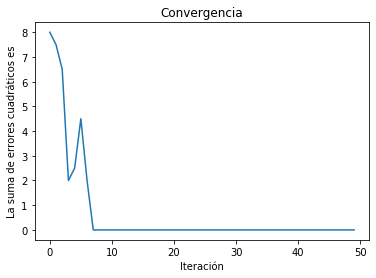

In [32]:
# Gráfica de la disminución del error a medida que aumenta el número de iteraciones (i. e., nos acercamos a la "convergencia")

epoch = np.arange(t)

plt.plot(epoch, errors)
plt.xlabel('Iteración')
plt.ylabel('La suma de errores cuadráticos es')
plt.title('Convergencia')

In [33]:
# Función "programada" para la evaluación de la predicción de 1 solo caso.

def predice(w,x):
    
    
#  A COMPLETAR   


    return ...

# Se predice el primer caso del conjunto de datos (que no haga bien un ejemplo no significa que no está bien)

print("Valor real ", Y2C_test[0])
print("Valor predicho ",predice(weights,X2C_test[0]))

Valor real  1
Valor predicho  1


In [34]:
# Para todos

def predice_varios(w,X):
    preds = []
    
    
    return np.array(preds)


def predice_varios(w,X):
    preds = []
    
    for x in X:
        preds.append(predice(w,x))
    
    return np.array(preds)


Y_pred_2C = predice_varios(weights,X2C_test)

evalua(Y2C_test, Y_pred_2C)

0.863013698630137